In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

import numpy as np
import tables

import cascade as cas
import cascade_secs as csx

import earth

# Helper functions definitions

In [14]:
# gamma = 2 #spectral index of incoming neutrino flux
gamma = 'data/phiHGextrap.dat' #this is how you would specify an incoming flux from a file. Needs to be 200x1, on the same energy grid as below
flavor = 3 # 1 = nu_e, 2= nu_mu, 3= nu_tau. Negative for antineutrinos
Na = 6.0221415e23

In [15]:
def get_avg_attn(flavor,gamma,h5filename = "./data/NuFATECrossSections.h5"):
    w,v,ci,energy_nodes,phi_0 = cas.get_eigs(flavor,gamma,h5filename)
    tlength = 230
    tvec = np.linspace(-1,0,tlength)
    phiv = energy_nodes*0.
    for ctheta in tvec:
        t = earth.get_t_earth(np.arccos(ctheta))*Na # g/ cm^2
        phisol = np.dot(v,(ci*np.exp(w*t)))/phi_0
        phiv = phiv + phisol
    phiv = phiv/tlength
    return energy_nodes, phiv

def get_avg_attn_secs(flavor,gamma,h5filename = "./data/NuFATECrossSections.h5"):
    w,v,ci,energy_nodes,phi_0 = csx.get_eigs(flavor,gamma,h5filename)
    tlength = 230
    tvec = np.linspace(-1,0,tlength)
    phiv = phi_0*0.
    for ctheta in tvec:
        t = earth.get_t_earth(np.arccos(ctheta))*Na # g/ cm^2
        phisol = np.dot(v,(ci*np.exp(w*t)))/phi_0
        phiv = phiv + phisol
    phiv = phiv/tlength
    phiv = phiv[0:200] #only keep non-tau bit
    return energy_nodes, phiv

# Example Earth attenuation for single flavor and zenith

In [16]:
flavor = -3
zenith = np.radians(100.)
w,v,ci,energy_nodes,phi_0 = cas.get_eigs(flavor,gamma, "./data/NuFATECrossSections.h5")

t = earth.get_t_earth(zenith)*Na
phisol = np.dot(v,(ci*np.exp(w*t)))/phi_0

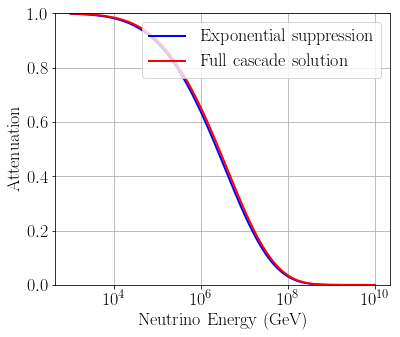

In [17]:
plt.figure(figsize=(6,5))
xsh5 = tables.open_file("./data/NuFATECrossSections.h5","r")
sigma_array = xsh5.root.total_cross_sections.nutaubarxs[:]
xsh5.close()
plt.semilogx(energy_nodes,np.exp(-sigma_array*t),c='b',lw=2)
plt.semilogx(energy_nodes,phisol,c='r',lw=2)

plt.legend(['Exponential suppression', 'Full cascade solution'],
          loc="upper right")
plt.xlabel(r"Neutrino Energy (GeV)")
plt.ylim(0.,1.)
plt.ylabel(r"Attenuation")
plt.grid()



In [18]:
import glob

In [19]:
xs_tables=glob.glob("./data/*.h5")
xs_tables_ct=glob.glob("./data/*HERA*.h5")
xs_tables_ct=glob.glob("./data/*CT*.h5")
xs_tables_nn=glob.glob("./data/*NN*.h5")

In [20]:
from matplotlib import rc, rcParams

rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern'], 'size' : 18})
cols = ['#29A2C6','#FF6D31','#FFCB18','#73B66B','#EF597B', '#333333']

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 18}

# Calculating and plotting zenith averaged Earth attenuation

In [21]:
energy_nodes, phim3 = get_avg_attn(-3,gamma)
energy_nodes, phim2 = get_avg_attn(-2,gamma)
energy_nodes, phim1 = get_avg_attn(-1,gamma)

energy_nodes, phi3 = get_avg_attn(3,gamma)
energy_nodes, phi2 = get_avg_attn(2,gamma)
energy_nodes, phi1 = get_avg_attn(1,gamma)

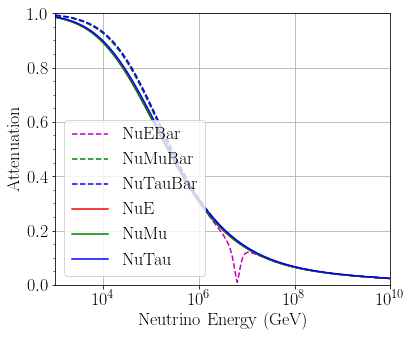

In [22]:
plt.figure(figsize=(6,5))
plt.semilogx(energy_nodes,phim1,linestyle='--',c='m',label="NuEBar")
plt.semilogx(energy_nodes,phim2,linestyle='--',c='g',label="NuMuBar")
plt.semilogx(energy_nodes,phim3,linestyle='--',c='b',label="NuTauBar")
plt.semilogx(energy_nodes,phi1,c='r',label="NuE")
plt.semilogx(energy_nodes,phi2,c='g',label="NuMu")
plt.semilogx(energy_nodes,phi3,c='b',label="NuTau")
plt.xlim(1e3,1e10)
plt.ylim(0.0,1.)
plt.legend(loc="lower left")
plt.xlabel("Neutrino Energy (GeV)")
plt.ylabel(r"Attenuation")
plt.minorticks_on()
plt.grid()

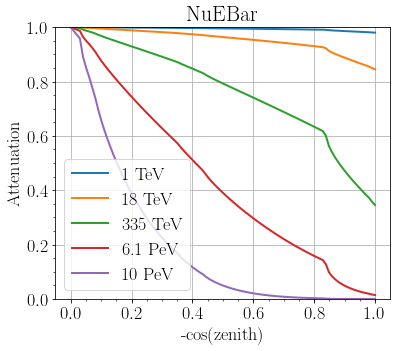

In [23]:
gamma = 2
flavor = -1
w,v,ci,energy_nodes,phi_0 = cas.get_eigs(flavor,gamma,"./data/NuFATECrossSections.h5")
tlength = 100
Eindex = 80 #which energy index do you want to see?

tvec = np.linspace(0,1,tlength)
phiv1 = tvec*0
phiv2 = tvec*0
phiv3 = tvec*0
phiv4 = tvec*0
phiv5 = tvec*0
for i in range(0,tlength):
    ctheta = tvec[i]
    t = earth.get_t_earth(np.arccos(-ctheta))*Na # g/ cm^2
    phisol = np.dot(v,(ci*np.exp(w*t)))*energy_nodes**(gamma-2.)
    phiv1[i] = phisol[0]
    phiv2[i] = phisol[25]
    phiv3[i] = phisol[50]
    phiv4[i] = phisol[75]
    phiv5[i] = phisol[99]

plt.figure(figsize=(6,5))
plt.plot(tvec,phiv1,lw=2)
plt.plot(tvec,phiv2,lw=2)
plt.plot(tvec,phiv3,lw=2)
plt.plot(tvec,phiv4,lw=2)
plt.plot(tvec,phiv5,lw=2)
plt.legend(['1 TeV','18 TeV','335 TeV','6.1 PeV','10 PeV'],loc="lower left")
plt.xlabel("-cos(zenith)")
plt.ylabel("Attenuation")
plt.title('NuEBar')
plt.minorticks_on()
plt.ylim(0.,1)
plt.grid()

# Calculating and plotting zenith averaged Earth attenuation with secondaries

In [24]:
energy_nodes,phim2s = get_avg_attn_secs(-2,gamma)
energy_nodes,phim1s = get_avg_attn_secs(-1,gamma)
energy_nodes,phi1s = get_avg_attn_secs(1,gamma)
energy_nodes,phi2s = get_avg_attn_secs(2,gamma)

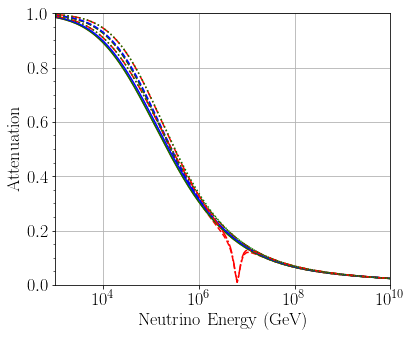

In [25]:
plt.figure(figsize=(6,5))
plt.semilogx(energy_nodes,phim1,linestyle='--',c='r')
plt.semilogx(energy_nodes,phim2,linestyle='--',c='g')
plt.semilogx(energy_nodes,phim3,linestyle='--',c='b')
plt.semilogx(energy_nodes,phi1,c='r')
plt.semilogx(energy_nodes,phi2,c='g')
plt.semilogx(energy_nodes,phi3,c='b')
plt.semilogx(energy_nodes,phi1s,c='r',linestyle='-.')
plt.semilogx(energy_nodes,phi2s,c='g',linestyle=':')
plt.semilogx(energy_nodes,phim1s,c='r',linestyle='-.')
plt.semilogx(energy_nodes,phim2s,c='g',linestyle=':')
plt.xlim(1e3,1e10)
plt.ylim(.0,1)
plt.ylabel("Attenuation")
plt.xlabel("Neutrino Energy (GeV)")
plt.minorticks_on()
plt.grid()